# Desenvolvimento de diferentes modelos em cima do dataset de dígitos MNIST

### Imports para o projeto + handling do dataset

In [40]:
#Imports necessários:
import matplotlib.pyplot as plt 
import tensorflow as tf
import numpy as np
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss


In [2]:
#Import do dataser que iremos trabalhar com:
from keras.datasets import mnist

In [3]:
#Separacao do dataset:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
#Visualizacao do training set e test set (dimensoes):
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


Podemos ver que as imagens têm dimensoes 28x28 e temos 60000 delas no training set e 10000 delas no test set.

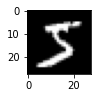

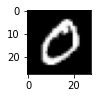

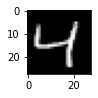

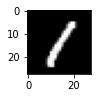

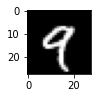

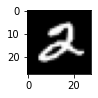

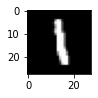

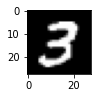

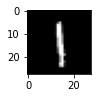

In [5]:
#Visualização de alguns dos exemplos que iremos trabalhar com:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.show()

### Perceptron com uma camada escondida, função de ativação sigmoid, função custo SSE, e otimização por descida de gradiente

In [6]:
#Flatten do dataset para alimentar os neuronios + colocar os valores das imagens entre 0 e 1.
x_train = x_train.reshape(-1, 28 * 28) / 255.0
x_test = x_test.reshape(-1, 28 * 28) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
x_train.shape

(60000, 784)

In [8]:
x_test.shape

(10000, 784)

In [9]:
y_train.shape

(60000, 10)

In [10]:
y_test.shape

(10000, 10)

313/313 [==============================] - 0s 1ms/step - loss: 0.0785 - accuracy: 0.5147
Loss do teste: 0.0785, Acuracia do teste: 51.47%


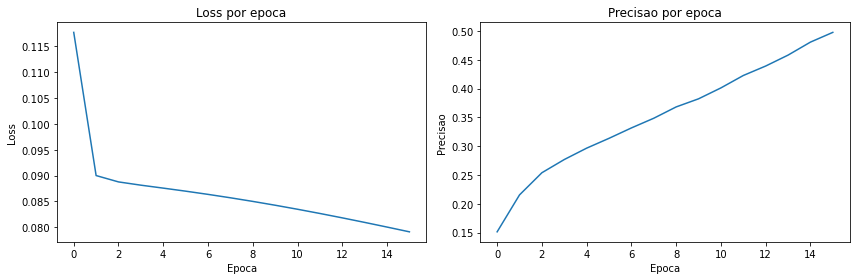

In [11]:
#Criacao do modelo
model1 = Sequential()

#Primeira camada - 128 neuronios + ativacao sigmoid
model1.add(Dense(128, activation='sigmoid', input_shape=(28 * 28,)))

#Output normal com 10 saidas (1 para cada digito)
model1.add(Dense(10, activation='sigmoid'))

#Modelo com loss SSE e descida por gradiente
model1.compile(loss=MeanSquaredError(), optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

#Salvar a loss e a precisao
loss_history = []
accuracy_history = []

#Treinamento usando "10 epocas", mini batch de 64
for epoch in range(16):
    history = model1.fit(x_train, y_train, batch_size=64, epochs=1, validation_data=(x_test, y_test))
    
    #Adicao das loss e accuracy para visualizacao
    loss_history.append(history.history['loss'][0])
    accuracy_history.append(history.history['accuracy'][0])

#Analise do modeli
loss, accuracy = model1.evaluate(x_test, y_test)
print(f"Loss do teste: {loss:.4f}, Acuracia do teste: {accuracy * 100:.2f}%")

#Plot dos graficos
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('Loss por epoca')
plt.xlabel('Epoca')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracy_history)
plt.title('Precisao por epoca')
plt.xlabel('Epoca')
plt.ylabel('Precisao')

plt.tight_layout()
plt.show()

Podemos ver que com essa configuração da rede ela não possui uma precisão boa e está quase fazendo um chute com 50% de precisao.

### Saída do tipo softmax com loss "cross entropy"

313/313 [==============================] - 0s 1ms/step - loss: 0.3239 - accuracy: 0.9102
Loss do teste: 0.3239, Acuracia do teste: 91.02%


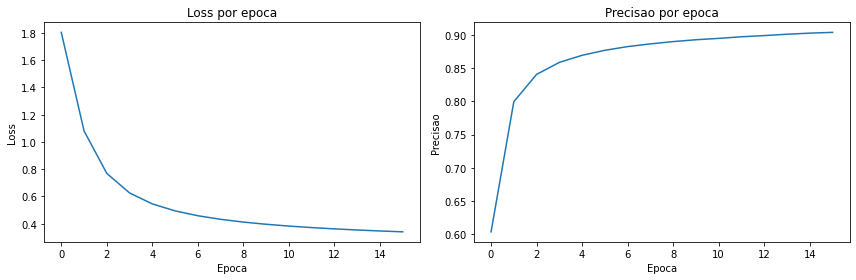

In [12]:
model2 = Sequential()

model2.add(Dense(128, activation='sigmoid', input_shape=(28 * 28,)))

#Output agora terá saída softmax pra multi-class
model2.add(Dense(10, activation='softmax'))

# Agora usaremos cross entropy para loss
model2.compile(loss=CategoricalCrossentropy(), optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

loss_history = []
accuracy_history = []

for epoch in range(16):
    history = model2.fit(x_train, y_train, batch_size=64, epochs=1, validation_data=(x_test, y_test))
    
    loss_history.append(history.history['loss'][0])
    accuracy_history.append(history.history['accuracy'][0])

loss, accuracy = model2.evaluate(x_test, y_test)
print(f"Loss do teste: {loss:.4f}, Acuracia do teste: {accuracy * 100:.2f}%")

#Plot dos graficos
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('Loss por epoca')
plt.xlabel('Epoca')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracy_history)
plt.title('Precisao por epoca')
plt.xlabel('Epoca')
plt.ylabel('Precisao')

plt.tight_layout()
plt.show()

Com a adição da softmax na camada de saída e o uso de cross entropy como loss já podemos perceber uma melhoria significativa no resultado do algoritmo.

### Modelo utilizando otimizador Adam

313/313 [==============================] - 0s 1ms/step - loss: 0.1288 - accuracy: 0.9704
Loss do teste: 0.1288, Acuracia do teste: 97.04%


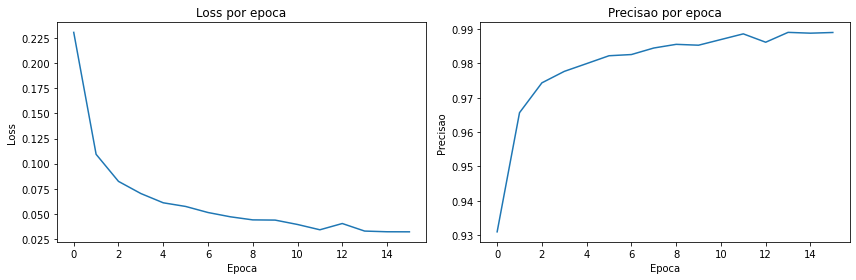

In [13]:
model3 = Sequential()

model3.add(Dense(128, activation='sigmoid', input_shape=(28 * 28,)))

model3.add(Dense(10, activation='softmax'))

# Agora usamos Adam
model3.compile(loss=CategoricalCrossentropy(), optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

loss_history = []
accuracy_history = []

for epoch in range(16):
    history = model3.fit(x_train, y_train, batch_size=64, epochs=1, validation_data=(x_test, y_test))
    
    loss_history.append(history.history['loss'][0])
    accuracy_history.append(history.history['accuracy'][0])

loss, accuracy = model3.evaluate(x_test, y_test)
print(f"Loss do teste: {loss:.4f}, Acuracia do teste: {accuracy * 100:.2f}%")

#Plot dos graficos
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('Loss por epoca')
plt.xlabel('Epoca')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracy_history)
plt.title('Precisao por epoca')
plt.xlabel('Epoca')
plt.ylabel('Precisao')

plt.tight_layout()
plt.show()

Já podemos ver que o modelo está realizando prediçoes muito boas a partir daqui.

## Modelo utilizando ReLU em vez de sigmoid

313/313 [==============================] - 0s 1ms/step - loss: 0.2618 - accuracy: 0.9691
Loss do teste: 0.2618, Acuracia do teste: 96.91%


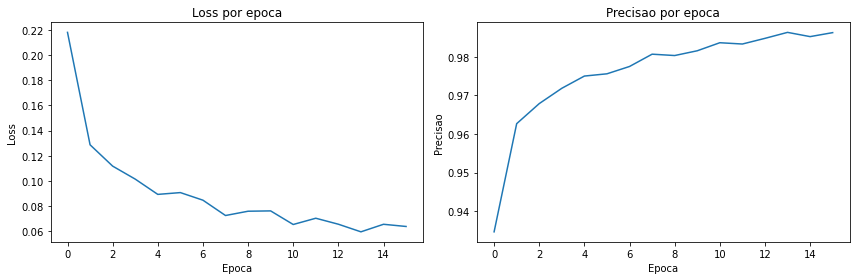

In [14]:
model4 = Sequential()

#Trocamos sigmoid para ReLU
model4.add(Dense(128, activation='relu', input_shape=(28 * 28,)))

model4.add(Dense(10, activation='softmax'))

model4.compile(loss=CategoricalCrossentropy(), optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

loss_history = []
accuracy_history = []

for epoch in range(16):
    history = model4.fit(x_train, y_train, batch_size=64, epochs=1, validation_data=(x_test, y_test))
    
    loss_history.append(history.history['loss'][0])
    accuracy_history.append(history.history['accuracy'][0])

loss, accuracy = model4.evaluate(x_test, y_test)
print(f"Loss do teste: {loss:.4f}, Acuracia do teste: {accuracy * 100:.2f}%")

#Plot dos graficos
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('Loss por epoca')
plt.xlabel('Epoca')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracy_history)
plt.title('Precisao por epoca')
plt.xlabel('Epoca')
plt.ylabel('Precisao')

plt.tight_layout()
plt.show()

Aqui já não houve tanta mudança nos resutados, mas pode-se ver uma ligeira melhoria na acuracia de teste. Pode-se perceber que a partir da 10a epoca tanto a loss como a precisao começam a ficam um pouco ruidosas. Vamos ver o que acontece se treinarmos apenas 10 epocas e ver se afeta o resultado.

313/313 [==============================] - 0s 1ms/step - loss: 0.2003 - accuracy: 0.9677
Loss do teste: 0.2003, Acuracia do teste: 96.77%


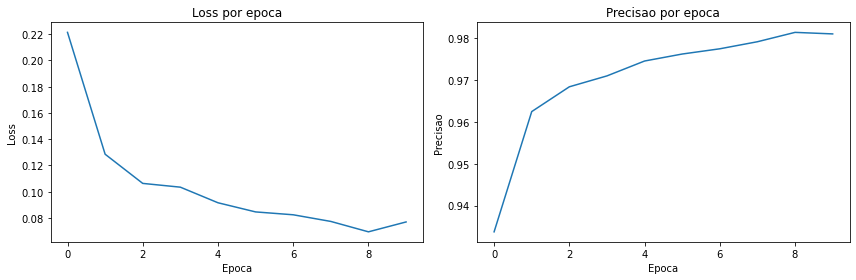

In [15]:
model5 = Sequential()

#Trocamos sigmoid para ReLU
model5.add(Dense(128, activation='relu', input_shape=(28 * 28,)))

model5.add(Dense(10, activation='softmax'))

model5.compile(loss=CategoricalCrossentropy(), optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

loss_history = []
accuracy_history = []

#Agora sao 10 epocas
for epoch in range(10):
    history = model5.fit(x_train, y_train, batch_size=64, epochs=1, validation_data=(x_test, y_test))
    
    loss_history.append(history.history['loss'][0])
    accuracy_history.append(history.history['accuracy'][0])

loss, accuracy = model5.evaluate(x_test, y_test)
print(f"Loss do teste: {loss:.4f}, Acuracia do teste: {accuracy * 100:.2f}%")

#Plot dos graficos
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('Loss por epoca')
plt.xlabel('Epoca')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracy_history)
plt.title('Precisao por epoca')
plt.xlabel('Epoca')
plt.ylabel('Precisao')

plt.tight_layout()
plt.show()

A loss do teste reduziu, enquanto que a acuracia diminui ligeiramente.

## Rede com uma camada escondida e 256 neuronios

313/313 [==============================] - 0s 1ms/step - loss: 0.2746 - accuracy: 0.9713
Loss do teste: 0.2746, Acuracia do teste: 97.13%


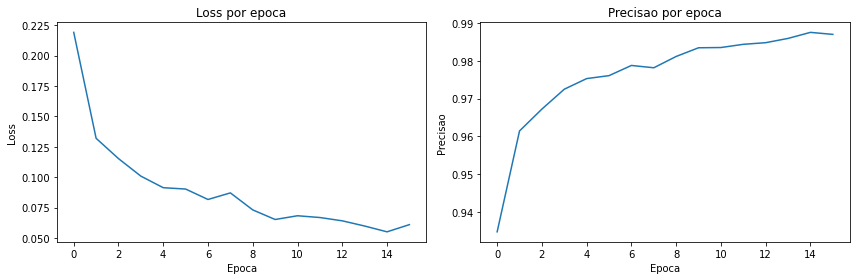

In [16]:
model6 = Sequential()

#Agora sao 256 neuronios
model6.add(Dense(256, activation='relu', input_shape=(28 * 28,)))

model6.add(Dense(10, activation='softmax'))

model6.compile(loss=CategoricalCrossentropy(), optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

loss_history = []
accuracy_history = []

for epoch in range(16):
    history = model6.fit(x_train, y_train, batch_size=64, epochs=1, validation_data=(x_test, y_test))
    
    loss_history.append(history.history['loss'][0])
    accuracy_history.append(history.history['accuracy'][0])

loss, accuracy = model6.evaluate(x_test, y_test)
print(f"Loss do teste: {loss:.4f}, Acuracia do teste: {accuracy * 100:.2f}%")

#Plot dos graficos
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('Loss por epoca')
plt.xlabel('Epoca')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracy_history)
plt.title('Precisao por epoca')
plt.xlabel('Epoca')
plt.ylabel('Precisao')

plt.tight_layout()
plt.show()

## Rede com duas camadas escondidas e 256 neuronios


313/313 [==============================] - 1s 2ms/step - loss: 0.1651 - accuracy: 0.9715
Loss do teste: 0.1651, Acuracia do teste: 97.15%


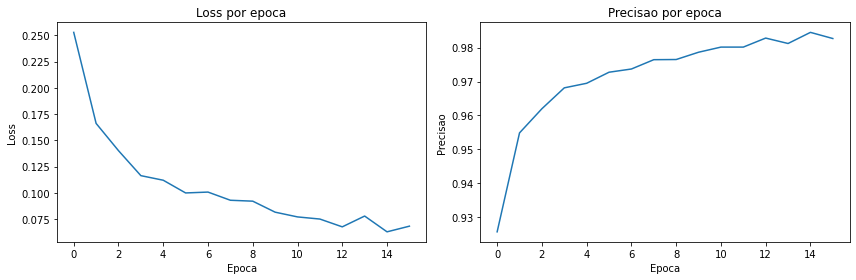

In [17]:
model7 = Sequential()

model7.add(Dense(256, activation='relu', input_shape=(28 * 28,)))

model7.add(Dense(256, activation='relu'))

model7.add(Dense(10, activation='softmax'))

model7.compile(loss=CategoricalCrossentropy(), optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

loss_history = []
accuracy_history = []

for epoch in range(16):
    history = model7.fit(x_train, y_train, batch_size=64, epochs=1, validation_data=(x_test, y_test))
    
    loss_history.append(history.history['loss'][0])
    accuracy_history.append(history.history['accuracy'][0])

loss, accuracy = model7.evaluate(x_test, y_test)
print(f"Loss do teste: {loss:.4f}, Acuracia do teste: {accuracy * 100:.2f}%")

#Plot dos graficos
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('Loss por epoca')
plt.xlabel('Epoca')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracy_history)
plt.title('Precisao por epoca')
plt.xlabel('Epoca')
plt.ylabel('Precisao')

plt.tight_layout()
plt.show()

A adição de mais camadas/neuronios não aparenta melhorar em quantidades significativas o modelo.

## Visualização - Modelo escholido foi o modelo 3

Agora queremos visualizar classificações erronias realizadas pelo modelo + matriz de confusao.
O modelo escolhido foi o 3o pois possui uma boa performance e poucos ruidos na loss e na acuracia.

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  #Normalizacao entre [0, 1]
x_train, x_test = x_train.reshape(-1, 28 * 28), x_test.reshape(-1, 28 * 28)  #Flatten

#One-hot para a saida
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

#Criacao do modelo
model = keras.Sequential([
    layers.Dense(128, activation='sigmoid', input_dim = 784), #28*28 = 784
    layers.Dense(10, activation='softmax') #10 labels = 10 saidas
])

model.compile(optimizer=Adam(learning_rate=0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=16, batch_size=64, validation_data=(x_test, y_test))

predictions = model.predict(x_test)

Epoch 1/16
938/938 [==============================] - 5s 4ms/step - loss: 0.4734 - accuracy: 0.8839 - val_loss: 0.2587 - val_accuracy: 0.9260
Epoch 2/16
938/938 [==============================] - 3s 4ms/step - loss: 0.2298 - accuracy: 0.9348 - val_loss: 0.1946 - val_accuracy: 0.9419
Epoch 3/16
938/938 [==============================] - 3s 3ms/step - loss: 0.1768 - accuracy: 0.9492 - val_loss: 0.1572 - val_accuracy: 0.9541
Epoch 4/16
938/938 [==============================] - 3s 4ms/step - loss: 0.1427 - accuracy: 0.9595 - val_loss: 0.1364 - val_accuracy: 0.9600
Epoch 5/16
938/938 [==============================] - 3s 3ms/step - loss: 0.1185 - accuracy: 0.9668 - val_loss: 0.1195 - val_accuracy: 0.9649
Epoch 6/16
938/938 [==============================] - 3s 3ms/step - loss: 0.0998 - accuracy: 0.9721 - val_loss: 0.1070 - val_accuracy: 0.9697
Epoch 7/16
938/938 [==============================] - 4s 4ms/step - loss: 0.0850 - accuracy: 0.9760 - val_loss: 0.0987 - val_accuracy: 0.9723
Epoch 

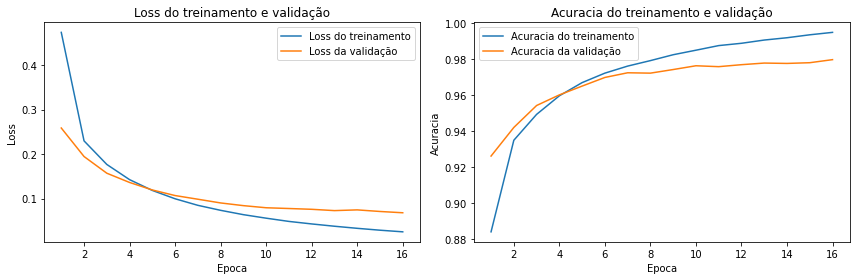

In [66]:
#Pegar dicionario do treinamento
history_dict = history.history

#Criacao dos plots da loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(history_dict['loss']) + 1), history_dict['loss'], label='Loss do treinamento')
plt.plot(range(1, len(history_dict['val_loss']) + 1), history_dict['val_loss'], label='Loss da validação')
plt.xlabel('Epoca')
plt.ylabel('Loss')
plt.title('Loss do treinamento e validação')
plt.legend()

#Criacao dos plots da acuracia
plt.subplot(1, 2, 2)
plt.plot(range(1, len(history_dict['accuracy']) + 1), history_dict['accuracy'], label='Acuracia do treinamento')
plt.plot(range(1, len(history_dict['val_accuracy']) + 1), history_dict['val_accuracy'], label='Acuracia da validação')
plt.xlabel('Epoca')
plt.ylabel('Acuracia')
plt.title('Acuracia do treinamento e validação')
plt.legend()

plt.tight_layout()
plt.show()

In [52]:
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [67]:
#Pega os ultimos valores
print(f'Loss do treinamento: {history_dict["loss"][-1]:.10f}')
print(f'Acuracia do treinamento: {history_dict["accuracy"][-1]*100:.4f}%')
print(f'Loss da validação: {history_dict["val_loss"][-1]:.10f}')
print(f'Acuracia da validação: {history_dict["val_accuracy"][-1]*100:.4f}%')

Loss do treinamento: 0.0255414117
Acuracia do treinamento: 99.4767%
Loss da validação: 0.0683383718
Acuracia da validação: 97.9600%


In [20]:
#Pega os indices dos labels que foram 'predicted'
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [21]:
#Pega os indices corretos
true_labels = np.argmax(y_test, axis=1)
true_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [22]:
#Pega os indices que foram classificados errados (i.e. vai pegar o indice dos dois arrays que estao diferentes EM VALOR)
misclassified_indices = np.where(predicted_labels != true_labels)[0]
misclassified_indices

array([  61,  115,  247,  321,  340,  381,  445,  447,  495,  578,  582,
        610,  619,  659,  691,  947,  965, 1014, 1039, 1044, 1107, 1112,
       1114, 1166, 1226, 1232, 1242, 1247, 1319, 1326, 1393, 1413, 1500,
       1522, 1530, 1549, 1581, 1621, 1681, 1709, 1717, 1748, 1751, 1754,
       1790, 1878, 1901, 1941, 1955, 1984, 2004, 2024, 2035, 2043, 2053,
       2070, 2109, 2118, 2130, 2135, 2162, 2185, 2272, 2293, 2329, 2414,
       2422, 2462, 2488, 2534, 2607, 2648, 2654, 2730, 2810, 2836, 2877,
       2896, 2915, 2939, 3073, 3117, 3422, 3503, 3520, 3558, 3559, 3567,
       3597, 3662, 3718, 3727, 3751, 3757, 3767, 3776, 3780, 3808, 3811,
       3818, 3838, 3853, 3893, 3902, 3906, 3941, 3943, 4065, 4075, 4078,
       4123, 4199, 4201, 4248, 4289, 4294, 4360, 4369, 4419, 4425, 4443,
       4497, 4536, 4547, 4551, 4639, 4731, 4740, 4807, 4814, 4823, 4880,
       4950, 4956, 4966, 5140, 5331, 5457, 5600, 5634, 5642, 5676, 5734,
       5749, 5835, 5887, 5891, 5936, 5955, 5972, 59

In [27]:
predicted_labels[61]

2

In [28]:
true_labels[61]

8

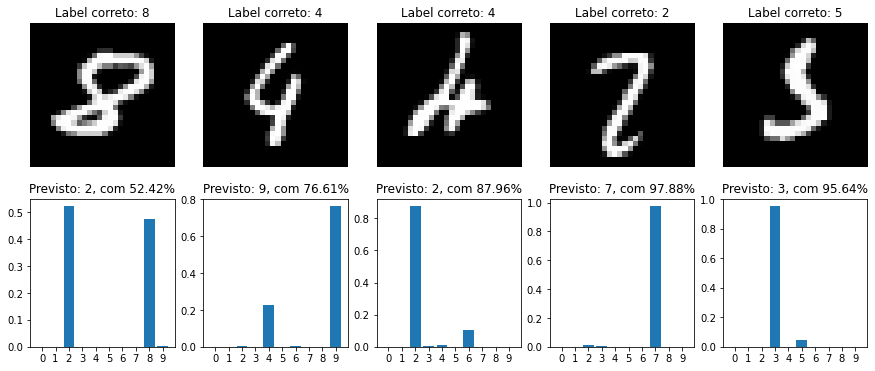

In [25]:
#Para mostrar as imagens
num_misclassified_to_display = 5 #Numero de displays
plt.figure(figsize=(15, 6))
for i in range(num_misclassified_to_display):
    plt.subplot(2, num_misclassified_to_display, i + 1)
    plt.imshow(x_test[misclassified_indices[i]].reshape(28, 28), cmap='gray') #Vai pegar a imagem em x_test no indice que foi classificado errado (e.g. a primeira sera de indice 61)
    plt.title(f'Label correto: {true_labels[misclassified_indices[i]]}') #Label certo
    plt.axis('off')
    plt.subplot(2, num_misclassified_to_display, i + 1 + num_misclassified_to_display)
    plt.bar(range(10), predictions[misclassified_indices[i]]) #Para mostrar os valores previstos para a previsao errada
    plt.xticks(range(10))
    plt.title(f'Previsto: {predicted_labels[misclassified_indices[i]]}, com {max(predictions[misclassified_indices[i]])*100:.2f}%') #Indice previsto

plt.show()

Sobre os erros cometidos pelo modelo, podemos perceber nos que foram exibidos (e.g. o 8 e os dois 4s mostrados) que um ser humano não cometeria esse erro de classificação. Já no 2 e no 5 classificados errados esse erro de classificação ja poderia ser cometido, pois os números estão representados de forma estranha.

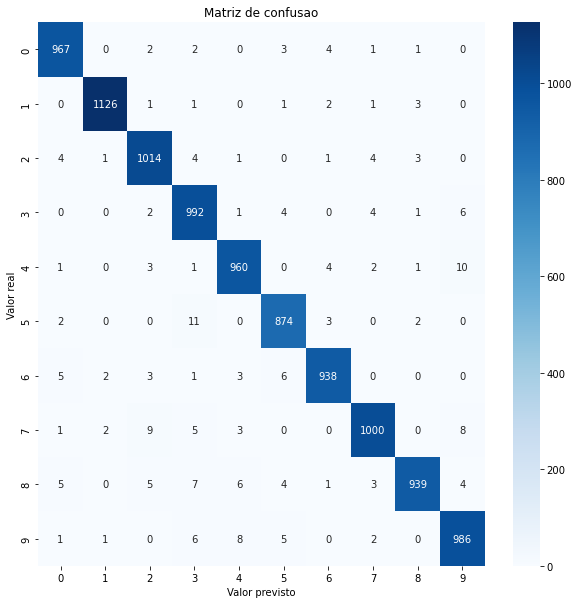

In [37]:
confusion = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 10))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Valor previsto')
plt.ylabel('Valor real')
plt.title('Matriz de confusao')
plt.show()

A partir da matriz de confusão podemos ver os principais erros cometidos pelo algoritmo e ver alguns casos que fazem sentido - como o 5 sendo confundido como o 3, como mostra o caso representado acima.
